# Loading Datasets

## Data Cleaning

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv("day_wise.csv")
dfw = pd.read_csv("worldometer_data.csv")
dfu = pd.read_csv("usa_county_wise.csv")
# Drop duplicate rows
dfw = dfw.drop_duplicates()
dfu = dfu.drop_duplicates()

#Fill NaN values with 0
dfw = dfw.fillna(0)
dfu = dfu.fillna(0)

dfw

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,0
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe


# Total Cases, Deaths, and Recoveries as at time of snapshot

In [12]:
total_case = dfw.groupby('Continent')[['Country/Region', 'TotalDeaths', 'TotalCases', 'TotalRecovered']].sum().reset_index()
total_case = total_case.drop(index=0)
total_case

C:\Users\BROOKLYNBOSS\AppData\Local\Temp\ipykernel_10480\2682241014.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_case = dfw.groupby('Continent')[['Country/Region', 'TotalDeaths', 'TotalCases', 'TotalRecovered']].sum().reset_index()


,Continent,TotalDeaths,TotalCases,TotalRecovered
1,Africa,22114.0,1011867,693620.0
2,Asia,100627.0,4689794,3508170.0
3,Australia/Oceania,281.0,21735,12620.0
4,Europe,205232.0,2982576,1587302.0
5,North America,229855.0,5919209,3151678.0
6,South America,154885.0,4543273,3116150.0


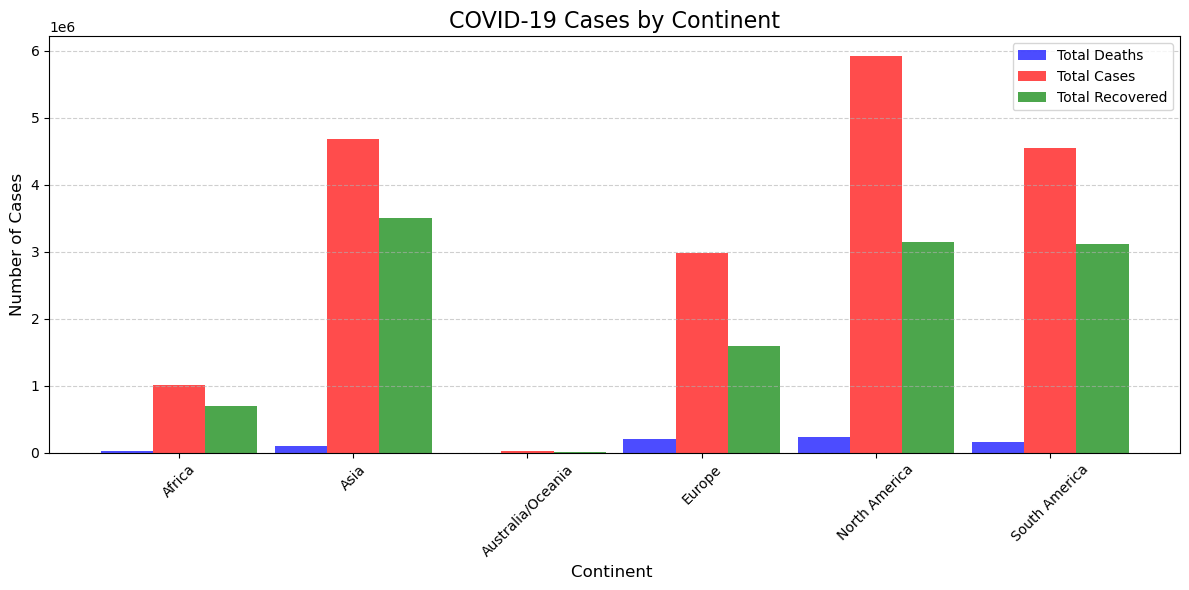

In [13]:
import matplotlib.pyplot as plt

x = np.arange(len(total_case))

# Plotting
plt.figure(figsize=(12, 6))

# Bar for Confirmed Cases
plt.bar(x - 0.3, total_case['TotalDeaths'], width=0.3, label='Total Deaths', color='blue', alpha=0.7)

# Bar for Deaths
plt.bar(x, total_case['TotalCases'], width=0.3, label='Total Cases', color='red', alpha=0.7)

# Bar for Recovered Cases
plt.bar(x + 0.3, total_case['TotalRecovered'], width=0.3, label='Total Recovered', color='green', alpha=0.7)

# Chart Details
plt.title('COVID-19 Cases by Continent', fontsize=16)
plt.xlabel('Continent ', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(x, total_case['Continent'], rotation=45)
plt.legend()

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


# Cases, Deaths, and Recoveries Over Time Trend

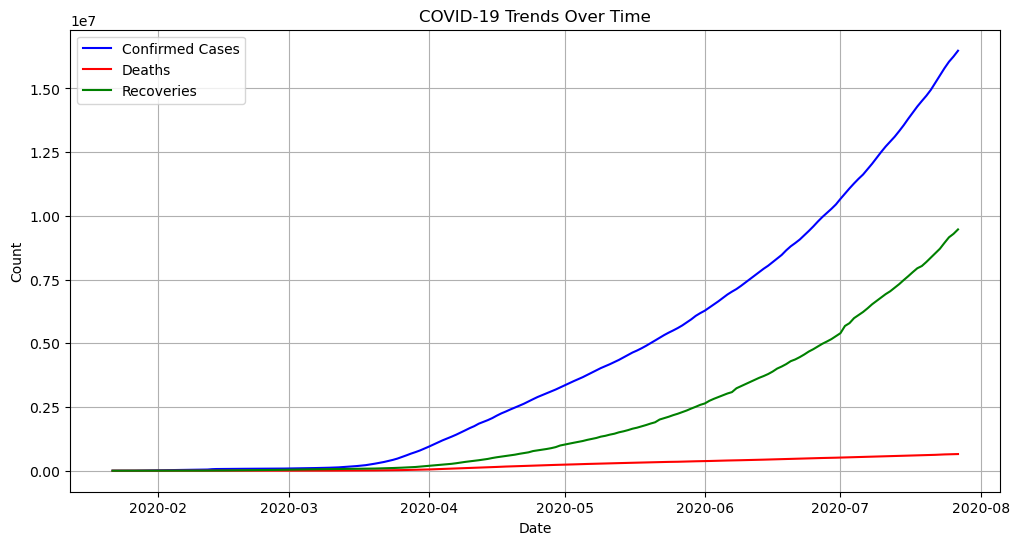

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df_grouped = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df_grouped['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Date'], df_grouped['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(df_grouped['Date'], df_grouped['Deaths'], label='Deaths', color='red')
plt.plot(df_grouped['Date'], df_grouped['Recovered'], label='Recoveries', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()


# Heatmap: Cases, Deaths, Recoveries by Continent

In [15]:

# Aggregate data by continent (or country, depending on the visualization)
continent_data = dfw.groupby('Continent')[['TotalCases', 'TotalDeaths', 'TotalRecovered']].sum().reset_index()
country_data = dfw.groupby('Country/Region')[['TotalCases', 'TotalDeaths', 'TotalRecovered']].sum().reset_index()

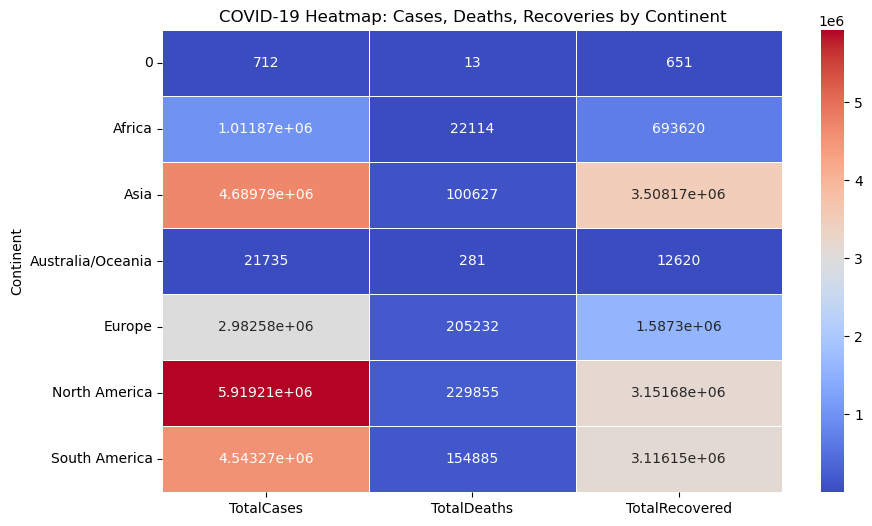

In [16]:
# Prepare data for heatmap
heatmap_data = continent_data.set_index('Continent')
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="coolwarm", linewidths=.5)

plt.title('COVID-19 Heatmap: Cases, Deaths, Recoveries by Continent')
plt.show()


# Heatmap: Death Rate by Country

C:\Users\BROOKLYNBOSS\AppData\Local\Temp\ipykernel_10480\1625092438.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  country_heatmap_data = dfw.pivot("Country/Region", "Continent", "Deaths/1M pop")


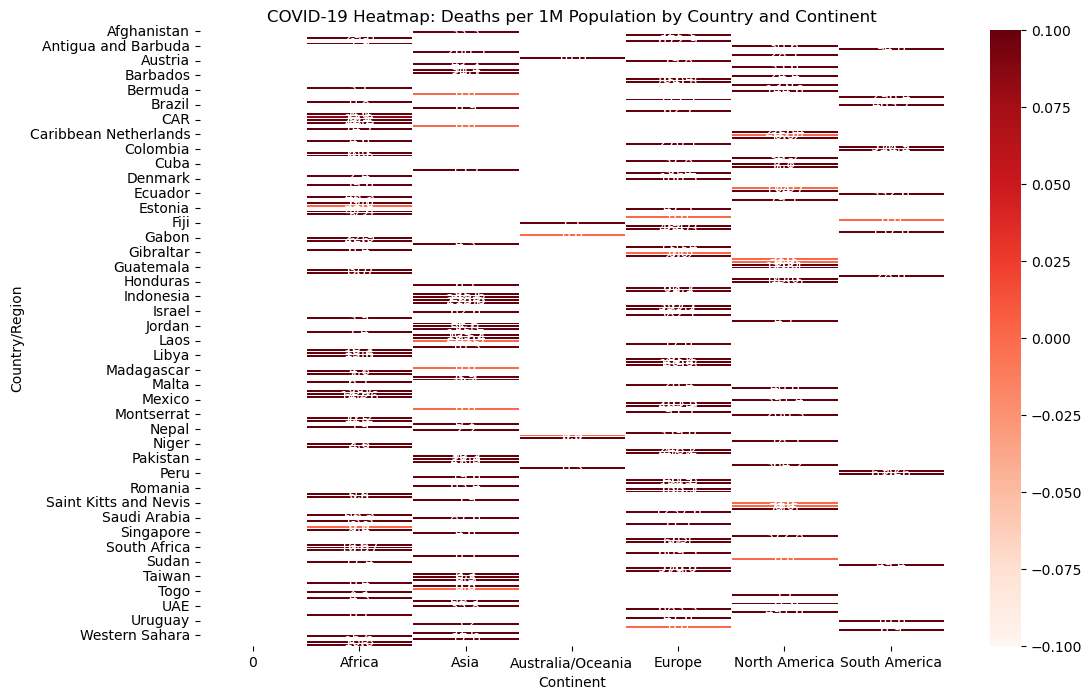

In [17]:
# Add Deaths per 1M Population
dfw['Deaths/1M pop'] = dfw['TotalDeaths'] / (dfw['Population'] / 1_000_000)
country_heatmap_data = dfw.pivot("Country/Region", "Continent", "Deaths/1M pop")

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_heatmap_data, annot=True, fmt=".1f", cmap="Reds", linewidths=.5)

plt.title('COVID-19 Heatmap: Deaths per 1M Population by Country and Continent')
plt.show()


# Country with Highest Death Rate

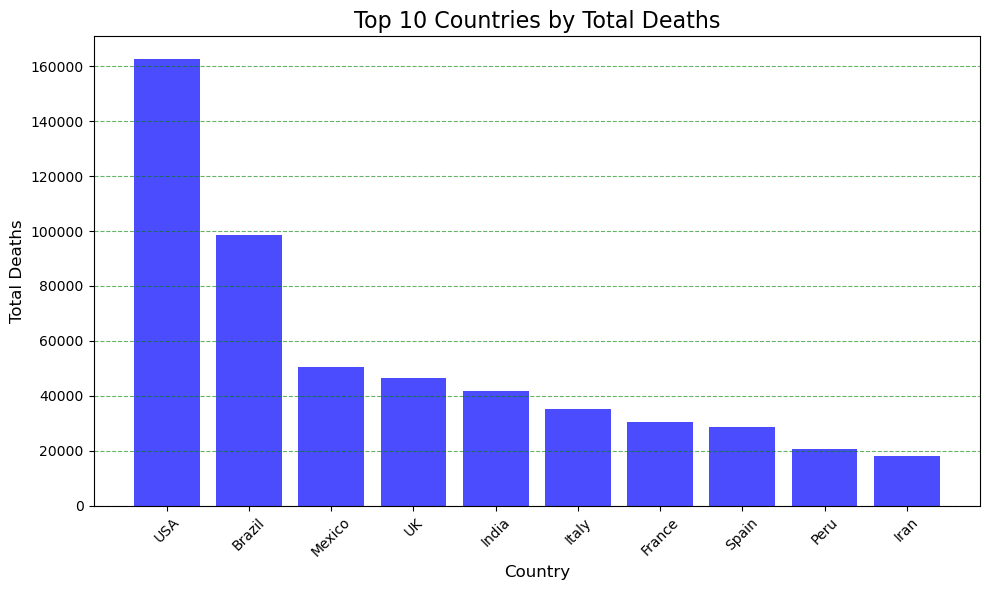

In [18]:
top_countries = dfw.sort_values(by="TotalDeaths", ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country/Region'], top_countries['TotalDeaths'], color='blue', alpha=0.7)

# Add titles and labels
plt.title('Top 10 Countries by Total Deaths', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6, color='green')
plt.tight_layout()
plt.show()



# Country with lowest Confirmed COVID Case

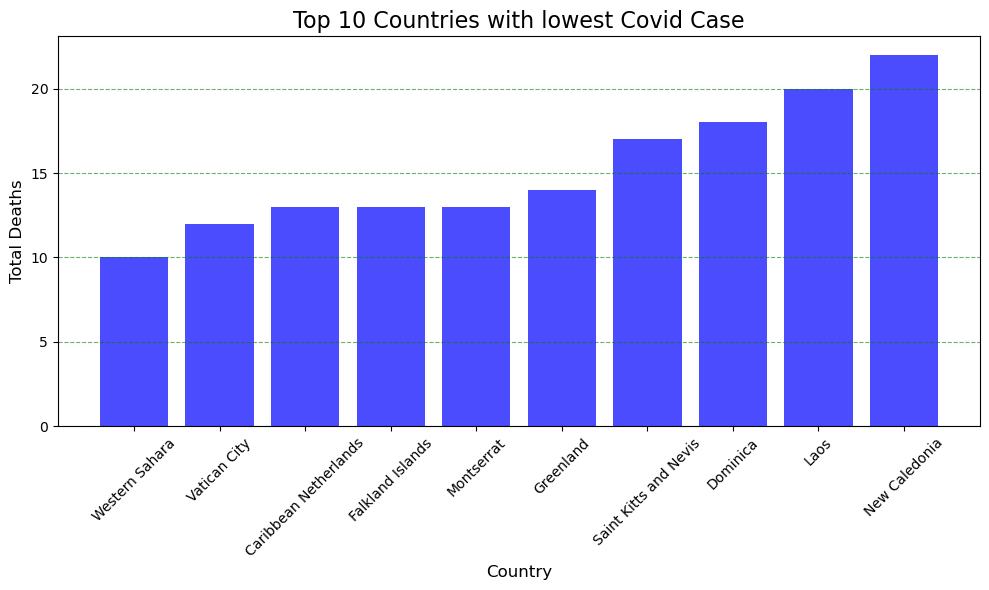

In [19]:
low_countries = dfw.sort_values(by="TotalCases", ascending=True).head(10)
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(low_countries['Country/Region'], low_countries['TotalCases'], color='blue', alpha=0.7)

# Add titles and labels
plt.title('Top 10 Countries with lowest Covid Case', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6, color='green')
plt.tight_layout()
plt.show()


# Countries with Top Recovery Rate  per Case Recorded

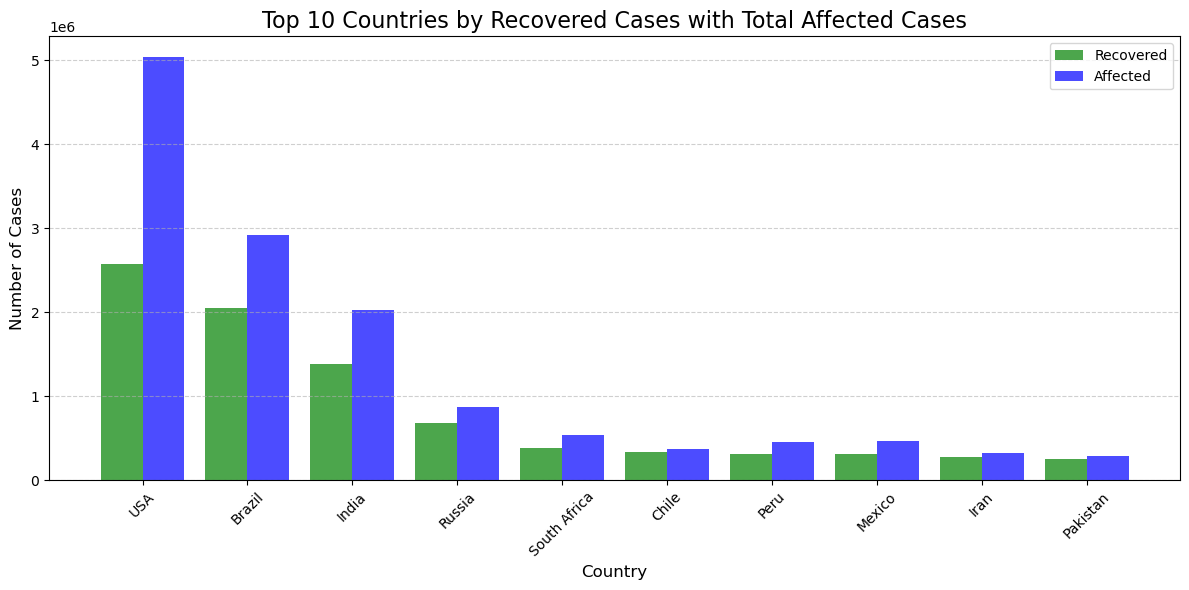

In [20]:
# Sort by TotalRecovered and select the top 10
top_10_recovered = dfw.sort_values(by='TotalRecovered', ascending=False).head(10)

# Define positions for bars
x = np.arange(len(top_10_recovered))

# Plotting
plt.figure(figsize=(12, 6))

# Bar for Total Recovered
plt.bar(x - 0.2, top_10_recovered['TotalRecovered'], width=0.4, label='Recovered', color='green', alpha=0.7)

# Bar for Total Affected (Total Cases)
plt.bar(x + 0.2, top_10_recovered['TotalCases'], width=0.4, label='Affected', color='blue', alpha=0.7)
plt.title('Top 10 Countries by Recovered Cases with Total Affected Cases', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(x, top_10_recovered['Country/Region'], rotation=45) 
plt.legend()

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


# The most affected states in the Heat Zone

In [21]:
state_data = dfu.groupby('Province_State')[['Date', 'Confirmed', 'Deaths']].sum().reset_index()
state_data = state_data.sort_values(by="Deaths", ascending=False).head(10)
state_data

C:\Users\BROOKLYNBOSS\AppData\Local\Temp\ipykernel_10480\3762773576.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_data = dfu.groupby('Province_State')[['Date', 'Confirmed', 'Deaths']].sum().reset_index()


,Province_State,Confirmed,Deaths
36,New York,39808447,3176945
34,New Jersey,16506714,1221339
25,Massachusetts,9874030,666157
26,Michigan,6690544,576093
17,Illinois,11900637,541672
43,Pennsylvania,8096993,537261
5,California,17618695,481757
7,Connecticut,4239220,374346
11,Florida,12657802,292541
22,Louisiana,5383429,285084


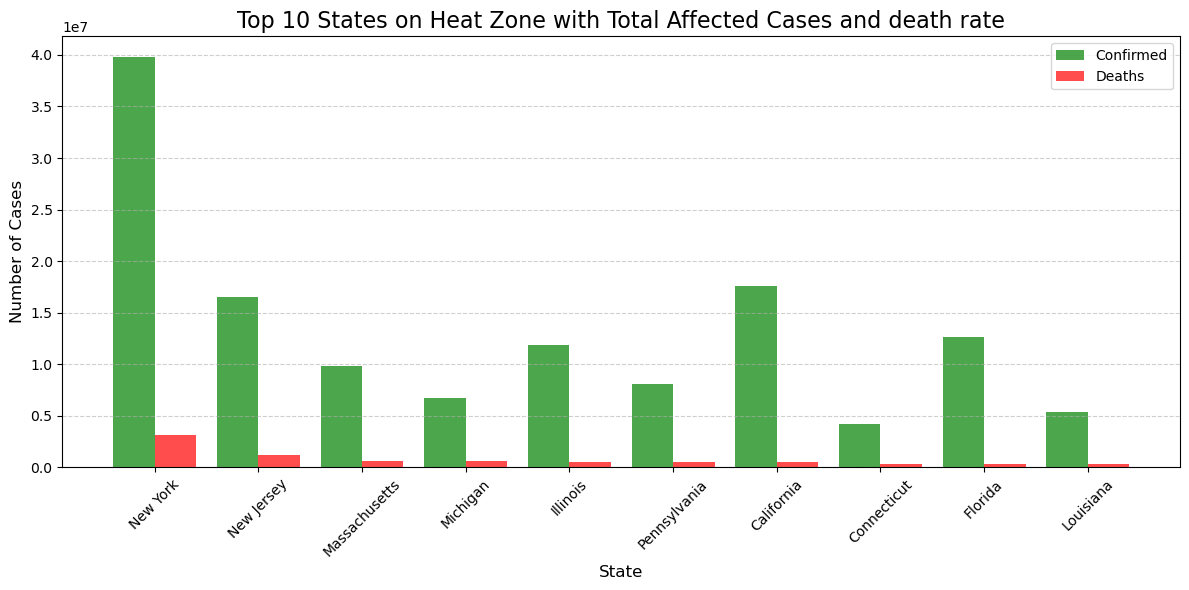

In [22]:

# Define positions for bars
x = np.arange(len(state_data))  # Position of bars on x-axis

# Plotting
plt.figure(figsize=(12, 6))

# Bar for Total Recovered
plt.bar(x - 0.2, state_data['Confirmed'], width=0.4, label='Confirmed', color='green', alpha=0.7)

# Bar for Total Affected (Total Cases)
plt.bar(x + 0.2, state_data['Deaths'], width=0.4, label='Deaths', color='red', alpha=0.7)
plt.title('Top 10 States on Heat Zone with Total Affected Cases and death rate', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(x, state_data['Province_State'], rotation=45) 
plt.legend()

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

# Percentage of affected per population

In [23]:
continent_total = dfw.groupby('Continent')[['Country/Region', 'Population', 'TotalCases']].sum().reset_index()
# Calculating the percentage of affected cases
continent_total['Affected Percentage(%)'] = (continent_total['TotalCases'] / continent_total['Population']) * 100
continent_total = continent_total.drop(index=0)
continent_total

C:\Users\BROOKLYNBOSS\AppData\Local\Temp\ipykernel_10480\3495312814.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent_total = dfw.groupby('Continent')[['Country/Region', 'Population', 'TotalCases']].sum().reset_index()


,Continent,Population,TotalCases,Affected Percentage(%)
1,Africa,1.343515e+09,1011867,0.075315
2,Asia,3.173656e+09,4689794,0.147773
3,Australia/Oceania,4.095791e+07,21735,0.053067
4,Europe,7.476775e+08,2982576,0.398912
5,North America,5.895035e+08,5919209,1.004101
6,South America,4.311105e+08,4543273,1.053854


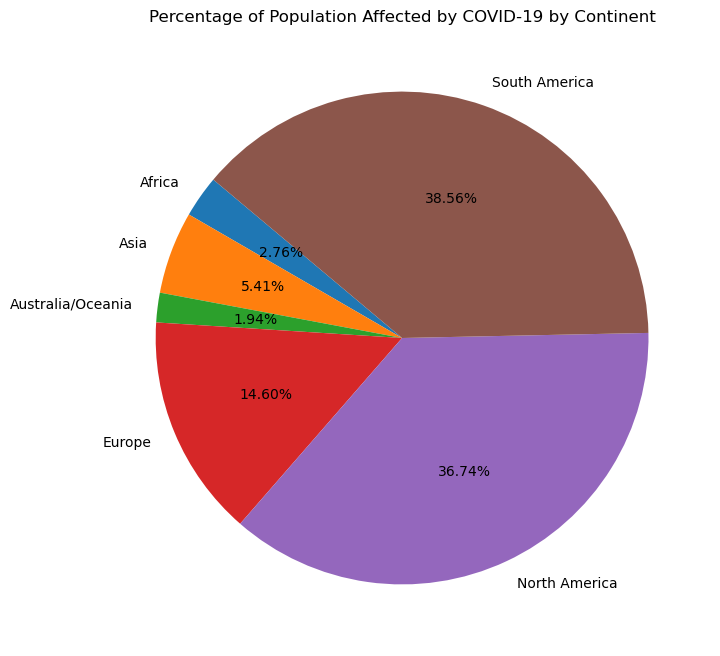

In [24]:
# Plotting the pie chart based on the "Affected Percentage(%)" column
plt.figure(figsize=(8, 8))
plt.pie(continent_total['Affected Percentage(%)'], labels=continent_total['Continent'], autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Population Affected by COVID-19 by Continent')
plt.show()

# Training a Time series model to Forecast Confirmed/ Death/ Recovery Cases

C:\Users\BROOKLYNBOSS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\BROOKLYNBOSS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\BROOKLYNBOSS\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


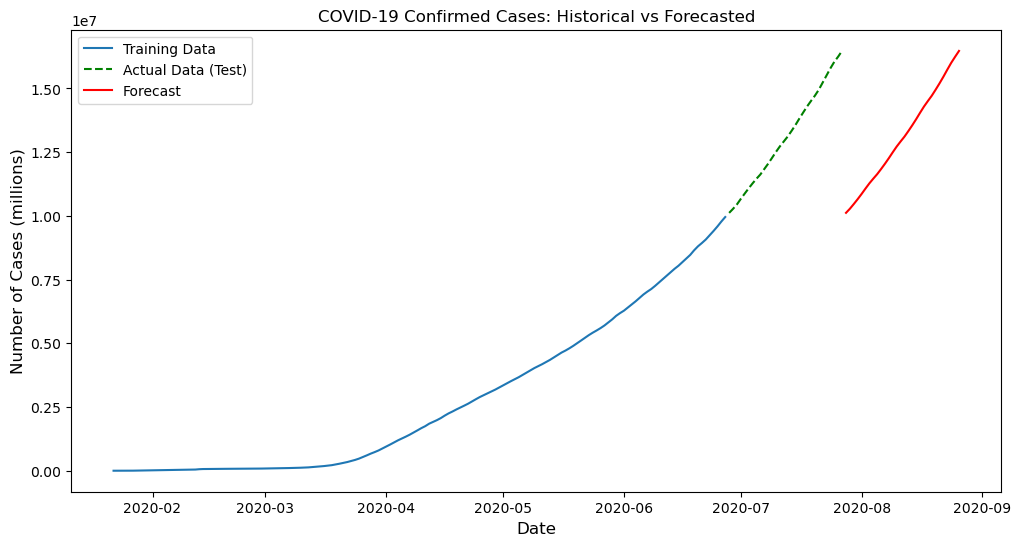

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv("day_wise.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
#Clean missing value
df.fillna(method='ffill', inplace=True)

# Target Selection
confirmed_cases = df['Confirmed']

# Time Frame Selection
train = confirmed_cases[:-30]
test = confirmed_cases[-30:]

#SARIMA Model fitting SARIMA order (3, 1, 3) and seasonal order (2, 0, 2, 7)
model = SARIMAX(train, 
                order=(3, 1, 3),         
                seasonal_order=(2, 0, 2, 7),
                enforce_stationarity=False, 
                enforce_invertibility=False)

model_fit = model.fit()

# Select forcast range
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)


# Plotting the results: Historical data vs forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data (Test)', color='green', linestyle='--')
plt.plot(pd.date_range(test.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('COVID-19 Confirmed Cases: Historical vs Forecasted')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases (millions)', fontsize=12)
plt.legend()
plt.show()



# Model evaluation

In [26]:
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test, forecast)
print(f'MAE: {mae}')

RMSE: 17722.522595190985
MAE: 11498.482334629756


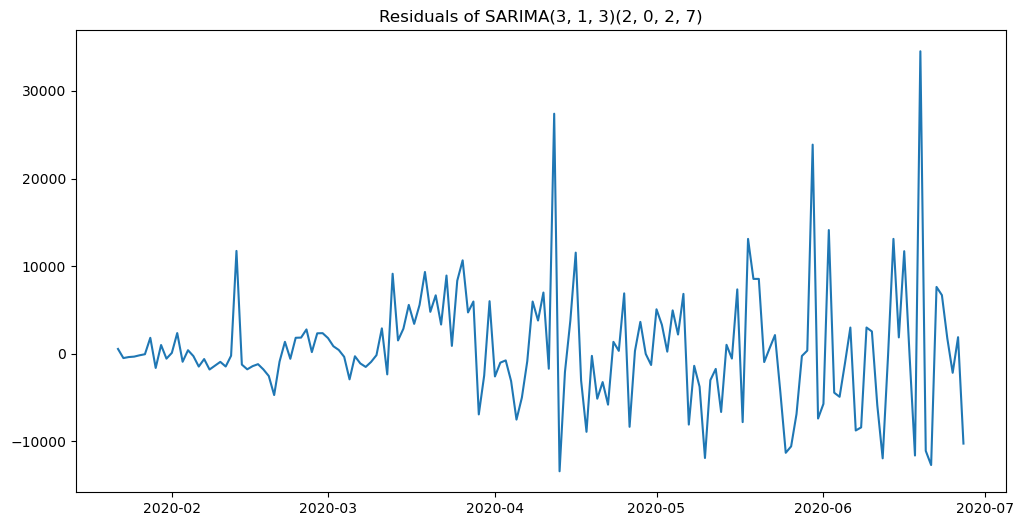

In [27]:
# Plot residuals to check randomness
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMA(3, 1, 3)(2, 0, 2, 7)')
plt.show()

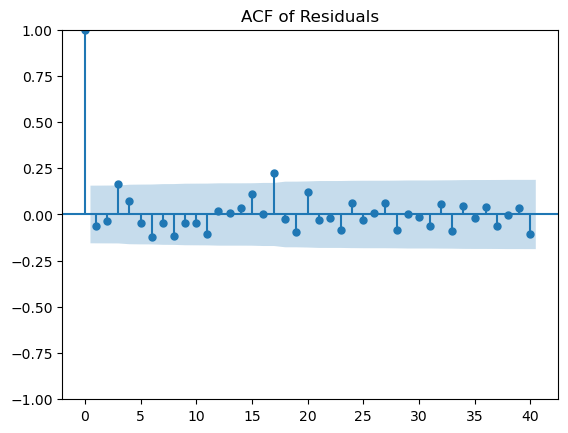

In [28]:
# ACF of residuals to check if they resemble white noise
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

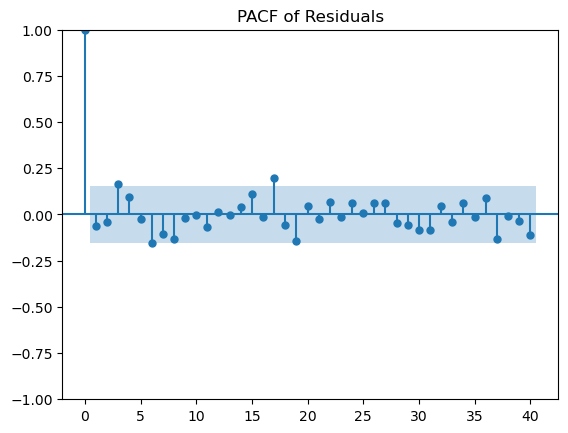

In [29]:
# PACF of residuals to check if they resemble white noise
plot_pacf(residuals, lags=40)
plt.title('PACF of Residuals')
plt.show()